In [4]:
# General imports
import numpy as np

# Pre-defined ansatz circuit and operator class for Hamiltonian
from qiskit.circuit.library import EfficientSU2
from qiskit.quantum_info import SparsePauliOp

# SciPy minimizer routine
from scipy.optimize import minimize

# Plotting functions
import matplotlib.pyplot as plt

In [5]:
# runtime imports
from qiskit_ibm_runtime import QiskitRuntimeService, Session
from qiskit_ibm_runtime import EstimatorV2 as Estimator

# To run on hardware, select the backend with the fewest number of jobs in the queue
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=False)
backend.name

'ibm_kyoto'

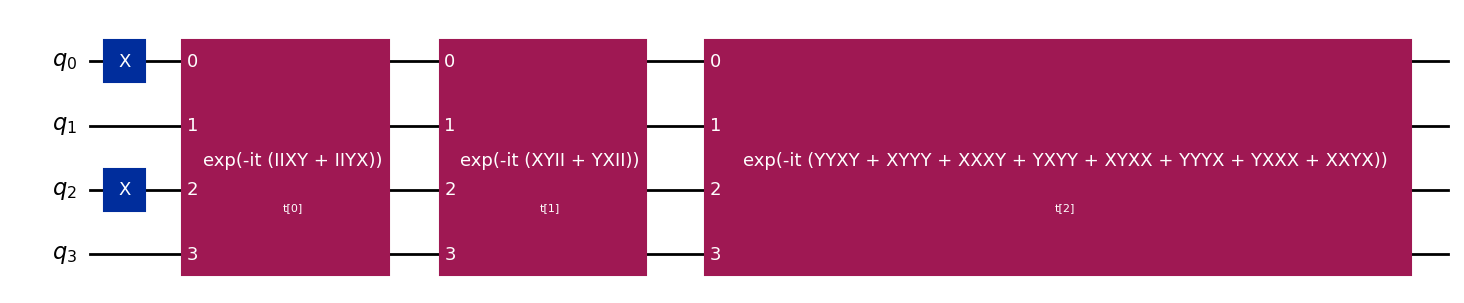

In [31]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper

from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import SLSQP
from qiskit.primitives import Estimator
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

import pylab


counts = []
values = []

def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)

driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

es_problem = driver.run()

mapper = JordanWignerMapper()

ansatz = UCCSD(
    es_problem.num_spatial_orbitals,
    es_problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        es_problem.num_spatial_orbitals,
        es_problem.num_particles,
        mapper,
    ),
)

ansatz.decompose().draw('mpl', style='iqp')

# # estimator = Estimator(options={'shots':1000000})
# estimator = Estimator()

# optimizer = SLSQP()

# vqe_solver = VQE(estimator, ansatz, optimizer, callback=store_intermediate_result)
# vqe_solver.initial_point = [0.0] * ansatz.num_parameters

# calc = GroundStateEigensolver(mapper, vqe_solver)

# res = calc.solve(es_problem)
# print(res)


# pylab.rcParams["figure.figsize"] = (12, 8)

# pylab.plot(counts, values, label=type(optimizer).__name__)
# pylab.xlabel("Eval count")
# pylab.ylabel("Energy")
# pylab.title("SLSQP Optimizer")
# pylab.legend(loc="upper right");

In [2]:
num_params = ansatz.num_parameters
num_params

3

In [6]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

ansatz_isa = pm.run(ansatz)

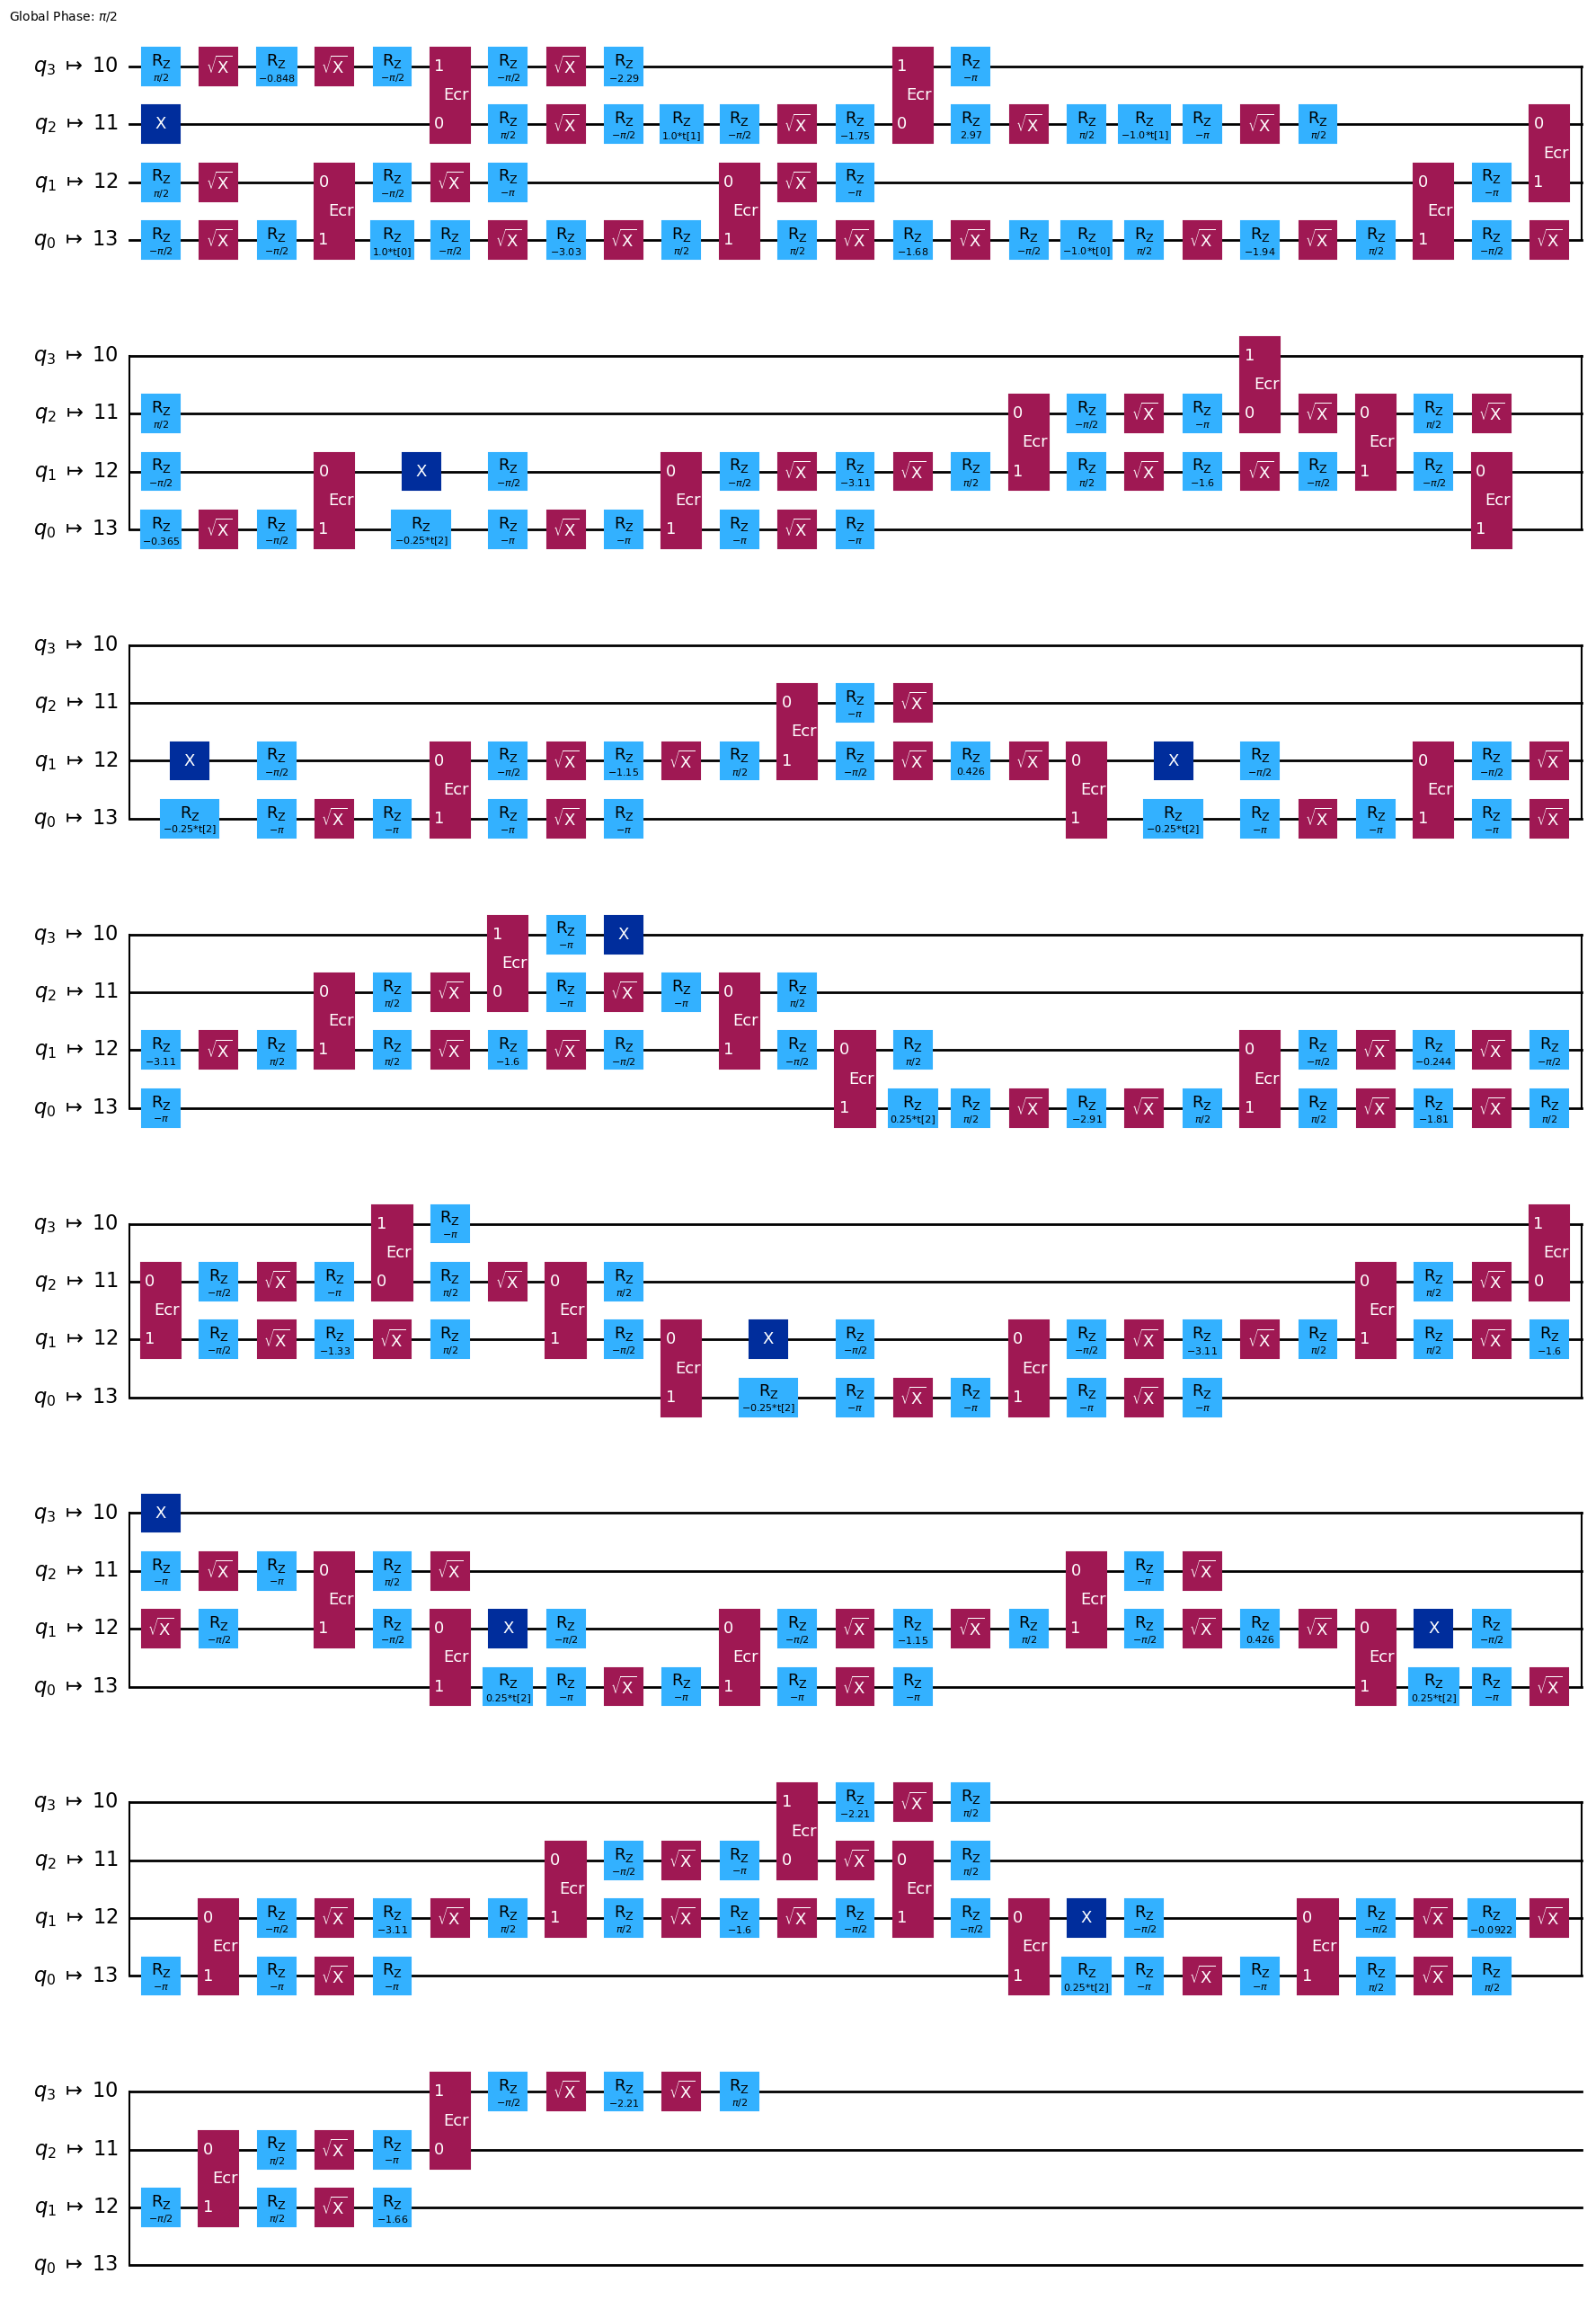

In [7]:
ansatz_isa.draw(output="mpl", idle_wires=False, style="iqp")

In [18]:
num_params = ansatz_isa.num_parameters
num_params

3

In [26]:
es_problem.hamiltonian

In [36]:
hamiltonian = SparsePauliOp.from_list(
    [("YI", 0.3980), ("ZI", -0.3980), ("ZZ", -0.0113), ("XX", 0.1810)]
)

In [33]:
hamiltonian = SparsePauliOp.from_list(
    [("IIII", -0.0996), 
     ("IIIZ", 0.1711), 
     ("IIZI", 0.1711), 
     ("IZII", -0.2225), 
     ("ZIII", -0.2225), 
     ("IIZZ", 0.1686), 
     ("IZIZ", 0.1205), 
     ("ZIIZ", 0.1658), 
     ("IZZI", 0.1658), 
     ("ZIZI", 0.1205), 
     ("ZZII", 0.1743), 
     ("XYYX", 0.0453), 
     ("YXXY", 0.0453), 
     ("YYXX", -0.0453), 
     ("XXYY", -0.0453)]
)

In [37]:
hamiltonian_isa = hamiltonian.apply_layout(layout=ansatz_isa.layout)

QiskitError: 'Number of qargs does not match (4 != 2)'